In [2]:
!unzip -q creditcard.csv.zip -d /home/vmada1

replace /home/vmada1/creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import (accuracy_score, classification_report, 
                             precision_recall_curve, average_precision_score, 
                             roc_curve, auc, confusion_matrix, make_scorer, 
                             precision_score, recall_score, f1_score, roc_auc_score)
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, learning_curve, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

from warnings import filterwarnings
filterwarnings('ignore')



In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [4]:
import pandas as pd
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#class percentage
class_percentage = df['Class'].value_counts(normalize=True) * 100
print("Percentage of each class:")
print(class_percentage)


Percentage of each class:
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


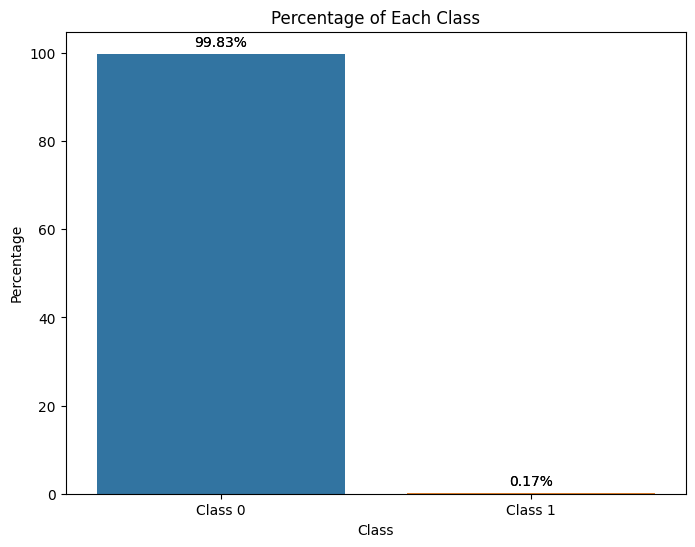

In [7]:
class_counts = df['Class'].value_counts(normalize=True) * 100

# Creating a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
bars = sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Percentage of Each Class')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.xticks(range(len(class_counts)), ['Class 0', 'Class 1'])  # Adjust labels based on your class names

# Adding text labels for each bar
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.2f') + '%',  # format the label
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # position
                  ha='center', va='center',  # center alignment
                  size=10, xytext=(0, 8),  # size and text position offset
                  textcoords='offset points')

plt.show()


In [8]:
null_values = df.isnull().sum()
print(null_values[null_values > 0])

Series([], dtype: int64)


In [9]:
print(df.duplicated().sum())

1081


In [10]:
duplicated=df.duplicated()
duplicated_class0=duplicated & (df['Class']==0)
print(f'Percentage of total duplicated data:{duplicated.mean()* 100:.1f}%')
print(f'Total duplicates of the Class 0: {duplicated_class0.sum()}')
print(f'Percentage of duplicates of Class 0: {duplicated_class0.sum() / df["Class"].sum() * 100:.1f}%')


Percentage of total duplicated data:0.4%
Total duplicates of the Class 0: 1062
Percentage of duplicates of Class 0: 215.9%


In [11]:
duplicated=df.duplicated()
duplicated_class1=duplicated & (df['Class']==1)
print(f'Percentage of total duplicated data:{duplicated.mean()* 100:.1f}%')
print(f'Total duplicates of the Class 1: {duplicated_class1.sum()}')
print(f'Percentage of duplicates of Class 1: {duplicated_class1.sum() / df["Class"].sum() * 100:.1f}%')


Percentage of total duplicated data:0.4%
Total duplicates of the Class 1: 19
Percentage of duplicates of Class 1: 3.9%


In [12]:

# Eliminating duplicated data
df = df.copy().drop_duplicates()

In [13]:
# Calculate the percentage of each class
class_percentage = df['Class'].value_counts(normalize=True) * 100

# Print the percentage of each class
print("Percentage of each class:")
print(class_percentage)


Percentage of each class:
Class
0    99.83329
1     0.16671
Name: proportion, dtype: float64


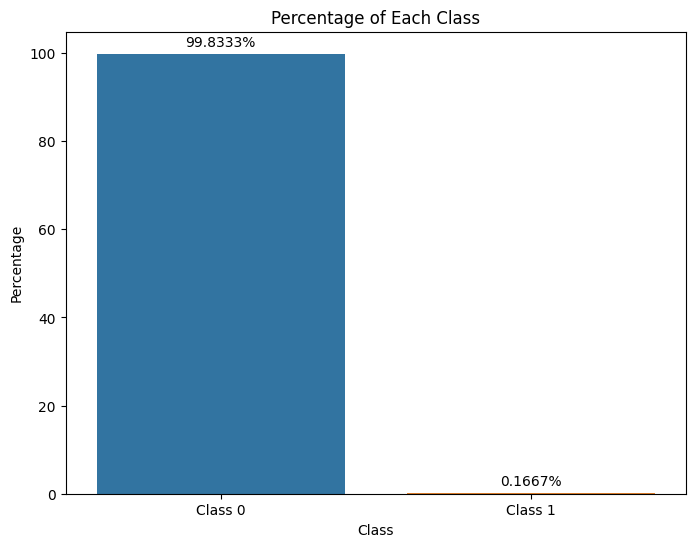

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'Class' is the column with target classes
class_counts = df['Class'].value_counts(normalize=True) * 100

# Creating a bar plot with percentage labels
plt.figure(figsize=(8, 6))
bars = sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Percentage of Each Class')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.xticks(range(len(class_counts)), ['Class 0', 'Class 1'])  # Adjust labels based on your class names

# Adding text labels for each bar
for bar in bars.patches:
    bars.annotate(format(bar.get_height(),'.4f') + '%',  # format the label
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # position
                  ha='center', va='center',  # center alignment
                  size=10, xytext=(0, 8),  # size and text position offset
                  textcoords='offset points')

plt.show()


In [17]:
df.shape

(283726, 31)

In [17]:
print(f'Total data by class: \n{df["Class"].value_counts()}')

Total data by class: 
Class
0    283253
1       473
Name: count, dtype: int64


In [20]:
percentage_by_class = df['Class'].value_counts(normalize=True)
print(f'Percentage of data by class: \n{percentage_by_class}')

Percentage of data by class: 
0    0.998333
1    0.001667
Name: Class, dtype: float64


In [21]:
data_filter = df[['Time', 'Amount', 'Class']]
fraudulent_transactions = df[df['Class'] == 1]
not_fraudulent_transactions = df[df['Class'] == 0]

In [22]:
basic_info=data_filter.info()
print(basic_info)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   Amount  283726 non-null  float64
 2   Class   283726 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 8.7 MB
None


In [14]:
# Descriptive statistics
description_data = data_filter.describe()
print(description_data)


                Time         Amount          Class
count  283726.000000  283726.000000  283726.000000
mean    94811.077600      88.472687       0.001667
std     47481.047891     250.399437       0.040796
min         0.000000       0.000000       0.000000
25%     54204.750000       5.600000       0.000000
50%     84692.500000      22.000000       0.000000
75%    139298.000000      77.510000       0.000000
max    172792.000000   25691.160000       1.000000


In [15]:
correlation_matrix=data_filter.corr()
print(correlation_matrix)

            Time    Amount     Class
Time    1.000000 -0.010559 -0.012359
Amount -0.010559  1.000000  0.005777
Class  -0.012359  0.005777  1.000000


In [16]:
missing_values_=data_filter.isnull().sum()
print(missing_values_)

Time      0
Amount    0
Class     0
dtype: int64


In [17]:
# Unique values
unique_values = data_filter.nunique()
print(unique_values)


Time      124592
Amount     32767
Class          2
dtype: int64


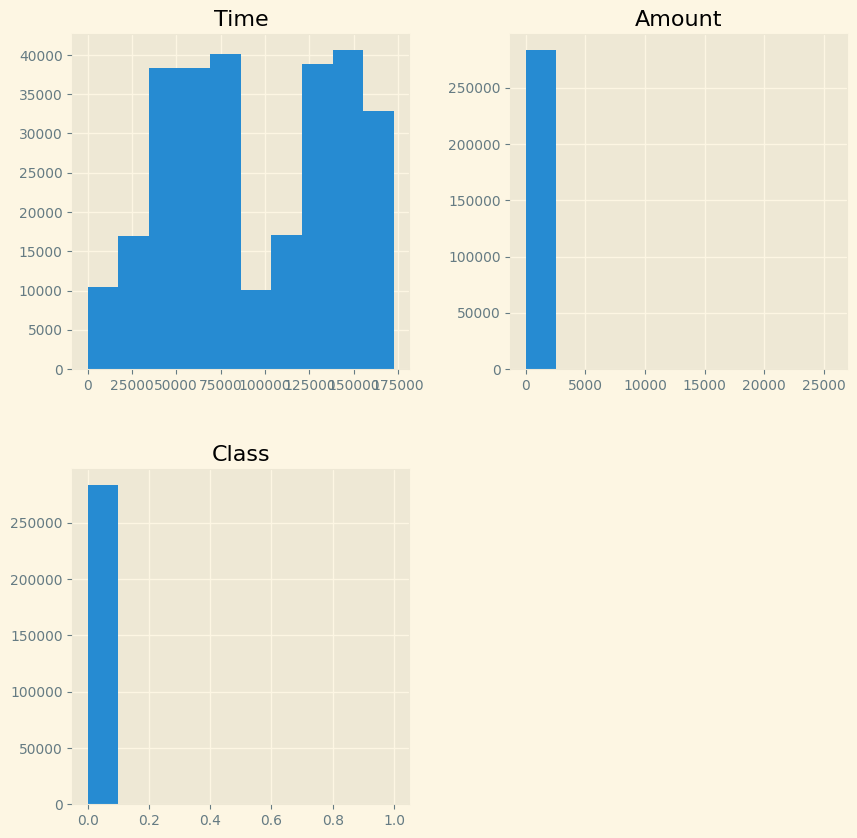

In [23]:
# Histograms for numerical variables
import matplotlib.pyplot as plt
data_filter.hist(figsize=(10, 10))
plt.show()


In [25]:
corr = df.corr()

# Filtering correlations
high_corr_pairs = []
correlation_value = 0.5
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) >= correlation_value:
            high_corr_pairs.append((corr.columns[i], corr.columns[j]))

print(f"Pairs of variables with a correlation greater than {correlation_value}:")
for pair in set(high_corr_pairs):
    print(pair)

Pairs of variables with a correlation greater than 0.5:
('Amount', 'V2')


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

In [25]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


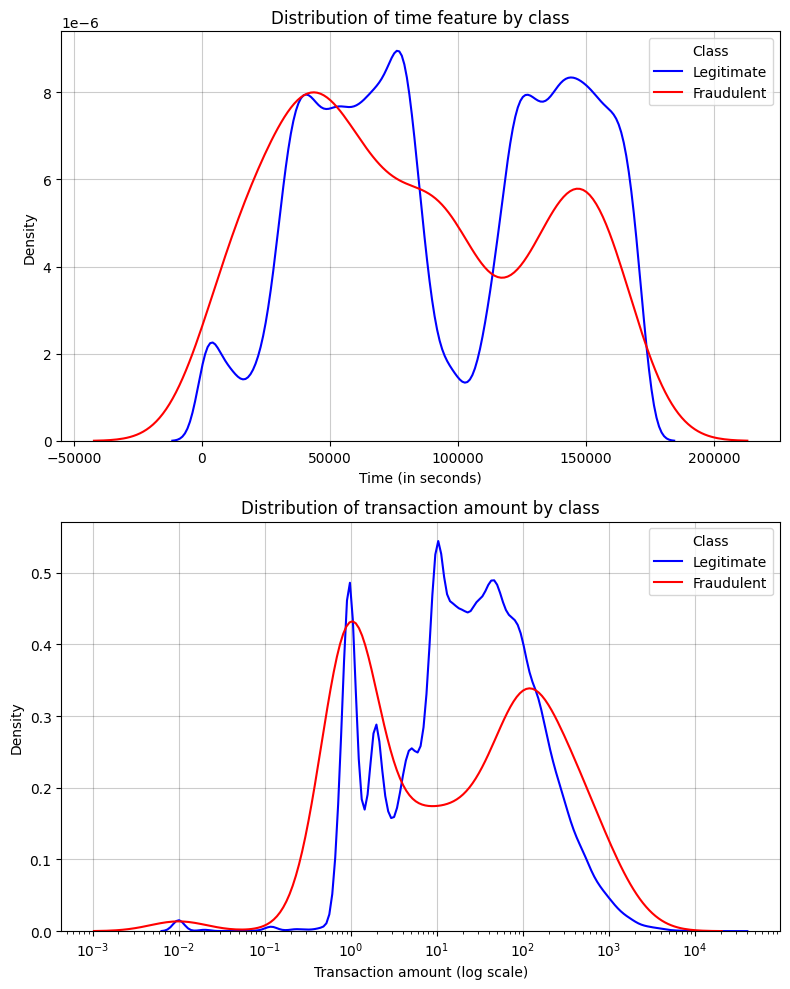

In [37]:

plt.style.use('default')
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# Plot for 'Time' feature by class
sns.kdeplot(data=df[df['Class'] == 0]['Time'], color='blue', label='Legitimate', ax=axs[0])
sns.kdeplot(data=df[df['Class'] == 1]['Time'], color='red', label='Fraudulent', ax=axs[0])
axs[0].set_xlabel('Time (in seconds)')
axs[0].set_ylabel('Density')
axs[0].set_title('Distribution of time feature by class')
axs[0].legend(title='Class')
axs[0].grid(True, alpha=0.2, color='black')

# Plot for 'Amount' feature by class with ensured positive values
axs[1].set_xscale('log')  # Apply log scale for 'Amount'
sns.kdeplot(data=df[(df['Class'] == 0) & (df['Amount'] > 0)]['Amount'], color='blue', label='Legitimate', ax=axs[1])
sns.kdeplot(data=df[(df['Class'] == 1) & (df['Amount'] > 0)]['Amount'], color='red', label='Fraudulent', ax=axs[1])
axs[1].set_title('Distribution of transaction amount by class')
axs[1].set_xlabel('Transaction amount (log scale)')
axs[1].set_ylabel('Density')
axs[1].legend(title='Class')
axs[1].grid(True, alpha=0.2, color='black')

plt.tight_layout()
plt.show()


In [35]:
# Check for missing values in 'Amount' for each class
print("Missing values for Class 0 (Legitimate):", df[df['Class'] == 0]['Amount'].isnull().sum())
print("Missing values for Class 1 (Fraudulent):", df[df['Class'] == 1]['Amount'].isnull().sum())


Missing values for Class 0 (Legitimate): 0
Missing values for Class 1 (Fraudulent): 0


In [19]:
def handle_imbalanced_data(dataset: pd.DataFrame, method: str='over_sampling', target_col: str='Class'):
    """
    Handle imbalanced data in a dataset.

    Parameters:
    dataset (DataFrame): The input dataset which is imbalanced.
    method (str): The method to handle imbalanced data. It can be 'over_sampling', 'under_sampling', 'smote'. Default is 'over_sampling'.
    target_col (str): The name of the target variable column. Default is 'Class'.

    Returns:
    DataFrame: The balanced dataset.
    """
    # Counts of each class
    count_class_0, count_class_1 = dataset[target_col].value_counts()

    # Dividing the dataset by class
    df_class_0 = dataset[dataset[target_col] == 0]
    df_class_1 = dataset[dataset[target_col] == 1]

    # Oversampling: Oversample 1-class and concat the DataFrames of both classes
    if method == 'over_sampling':
        df_class_1_over = df_class_1.sample(count_class_0, replace=True)
        return pd.concat([df_class_0, df_class_1_over], axis=0)

    # Undersampling: Undersample 0-class and concat the DataFrames of both classes
    elif method == 'under_sampling':
        df_class_0_under = df_class_0.sample(count_class_1)
        return pd.concat([df_class_0_under, df_class_1], axis=0)

    # SMOTE: Using SMOTE to deal with the imbalanced data
    elif method == 'smote':
        smote = SMOTE(random_state=42)
        X = dataset.drop(target_col, axis=1)
        y = dataset[target_col]
        X_sm, y_sm = smote.fit_resample(X, y)
        X_sm_df= pd.DataFrame(X_sm, columns=X.columns)
        y_sm_df =pd.DataFrame(y_sm, columns=[target_col])
        df_sm = pd.concat([X_sm_df, y_sm_df], axis=1)
        return df_sm

    else:
        raise ValueError("Invalid method. It should be 'over_sampling', 'under_sampling', 'smote' ... ")

In [20]:
for method in ['over_sampling', 'under_sampling', 'smote']:
    balanced_data = handle_imbalanced_data(df, method=method, target_col='Class')
    class_counts = balanced_data['Class'].value_counts()
    print(f'Balanced data using {method} method: \n{class_counts}\n')

Balanced data using over_sampling method: 
Class
0    283253
1    283253
Name: count, dtype: int64

Balanced data using under_sampling method: 
Class
0    473
1    473
Name: count, dtype: int64

Balanced data using smote method: 
Class
0    283253
1    283253
Name: count, dtype: int64



In [22]:
# Scaler to use
scaler = RobustScaler()

# Scaling the 'Amount' and 'Time' columns and dropping its original columns
df_scaled = df.copy()
df_scaled[['Amount_normalized', 'Time_normalized']] = scaler.fit_transform(df[['Amount', 'Time']])

df_scaled.drop(['Amount', 'Time'], axis=1, inplace=True)
df_scaled.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Amount_normalized,Time_normalized
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,...,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,0.001667,0.924387,0.118912
std,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,...,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,0.040796,3.482123,0.557988
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,...,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,-0.305938,-0.995290
25%,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,...,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,0.000000,-0.228063,-0.358286
50%,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,...,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,0.000000,0.000000,0.000000
75%,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,...,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,0.000000,0.771937,0.641714
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,...,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,1.000000,356.962314,1.035329


In [45]:
# Perform training for each model
for method in ['over_sampling', 'under_sampling', 'smote']:
    balanced_data = handle_imbalanced_data(df_scaled, method=method)
    X = balanced_data.drop('Class', axis=1)
    y = balanced_data['Class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    # Train the RandomForestClassifier
    rf_classifier.fit(X_train, y_train)

    y_pred_rf = rf_classifier.predict(X_test)
    print(f"Classification report for {method} and {rf_classifier.__class__.__name__}: \n{classification_report(y_test, y_pred_rf)}")
    print('\n')



Classification report for over_sampling and RandomForestClassifier: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84888
           1       1.00      1.00      1.00     85064

    accuracy                           1.00    169952
   macro avg       1.00      1.00      1.00    169952
weighted avg       1.00      1.00      1.00    169952



Classification report for under_sampling and RandomForestClassifier: 
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       140
           1       0.96      0.92      0.94       144

    accuracy                           0.94       284
   macro avg       0.94      0.94      0.94       284
weighted avg       0.94      0.94      0.94       284



Classification report for smote and RandomForestClassifier: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84880
           1       1.00      1.00

In [50]:
# Assuming you have a function handle_imbalanced_data that can undersample your dataset
balanced_data = handle_imbalanced_data(df_scaled, method='under_sampling')
# Preparing features and target variable
X = balanced_data.drop('Class', axis=1)
y = balanced_data['Class']
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# List of models to train
models = [
    RandomForestClassifier(n_estimators=100, random_state=42),
    LogisticRegression(random_state=42),
    DecisionTreeClassifier(random_state=42),
    GaussianNB(),
    KNeighborsClassifier(),
    SVC()
]

# Training and evaluating each model
for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Output the classification report for each model
    print(f"Classification report for {model_name} using undersampling:\n{classification_report(y_test, y_pred)}")
    print('\n')


Classification report for RandomForestClassifier using undersampling:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       140
           1       0.94      0.93      0.93       144

    accuracy                           0.93       284
   macro avg       0.93      0.93      0.93       284
weighted avg       0.93      0.93      0.93       284



Classification report for LogisticRegression using undersampling:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       140
           1       0.96      0.92      0.94       144

    accuracy                           0.94       284
   macro avg       0.94      0.94      0.94       284
weighted avg       0.94      0.94      0.94       284



Classification report for DecisionTreeClassifier using undersampling:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       140
           1       0.86    

In [51]:
# Model to train

##### Best parameter for RandomForestClassifier, (choose after all the notebook is finished) #####
after_parameters = {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 
                    'max_features': 'log2', 'max_depth': 5, 'criterion': 'gini', 
                    'class_weight': 'balanced_subsample', 'bootstrap': False}

model = RandomForestClassifier(**after_parameters, random_state=42)

# Perform training for each model
for method in ['over_sampling', 'under_sampling', 'smote']:
    balanced_data = handle_imbalanced_data(df_scaled, method=method)
    X = balanced_data.drop('Class', axis=1)
    y = balanced_data['Class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Classification report for {method} and {model.__class__.__name__}: \n{classification_report(y_test, y_pred)}")
    print('\n')

Classification report for over_sampling and RandomForestClassifier: 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84888
           1       1.00      0.91      0.95     85064

    accuracy                           0.95    169952
   macro avg       0.96      0.96      0.95    169952
weighted avg       0.96      0.95      0.95    169952



Classification report for under_sampling and RandomForestClassifier: 
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       140
           1       0.99      0.90      0.95       144

    accuracy                           0.95       284
   macro avg       0.95      0.95      0.95       284
weighted avg       0.95      0.95      0.95       284



Classification report for smote and RandomForestClassifier: 
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     84880
           1       1.00      0.88

In [23]:
# Data to train and test model using under_sampling method
balanced_data = handle_imbalanced_data(df_scaled, method='under_sampling')
X = balanced_data.drop('Class', axis=1)
y = balanced_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Classification report for under-sampling and RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       140
           1       0.98      0.90      0.94       144

    accuracy                           0.94       284
   macro avg       0.94      0.94      0.94       284
weighted avg       0.94      0.94      0.94       284

ROC-AUC Score for under-sampling: 0.98
Sensitivity for under-sampling: 0.90



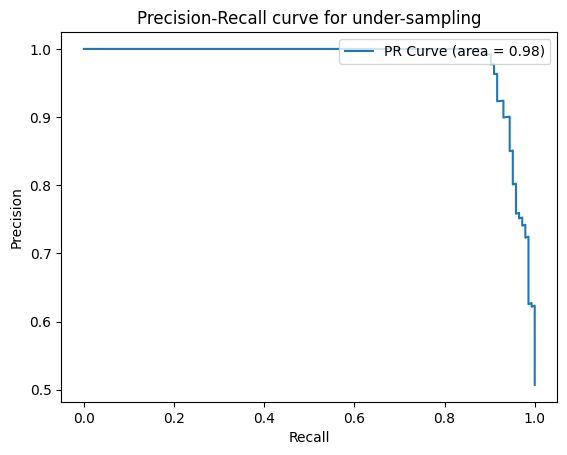

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, recall_score, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Set best parameters for RandomForestClassifier
after_parameters = {
    'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2,
    'max_features': 'log2', 'max_depth': 5, 'criterion': 'gini',
    'class_weight': 'balanced_subsample', 'bootstrap': False
}

model = RandomForestClassifier(**after_parameters, random_state=42)

# Assume handle_imbalanced_data is your function to undersample the dataset
balanced_data = handle_imbalanced_data(df_scaled, method='under_sampling')
X = balanced_data.drop('Class', axis=1)
y = balanced_data['Class']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_train_pred= model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Output the classification report
print(f"Classification report for under-sampling and {model.__class__.__name__}:\n{classification_report(y_test, y_pred)}")

# Calculate and print ROC-AUC and Sensitivity (Recall)
roc_auc = roc_auc_score(y_test, y_pred_proba)
sensitivity = recall_score(y_test, y_pred, pos_label=1)  # Sensitivity is the recall of the positive class
print(f"ROC-AUC Score for under-sampling: {roc_auc:.2f}")
print(f"Sensitivity for under-sampling: {sensitivity:.2f}\n")

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

# Plotting Precision-Recall Curve
plt.figure()
plt.plot(recall, precision, label=f'PR Curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for under-sampling')
plt.legend(loc='upper right')
plt.show()


Training Accuracy: 0.96
Testing Accuracy: 0.94


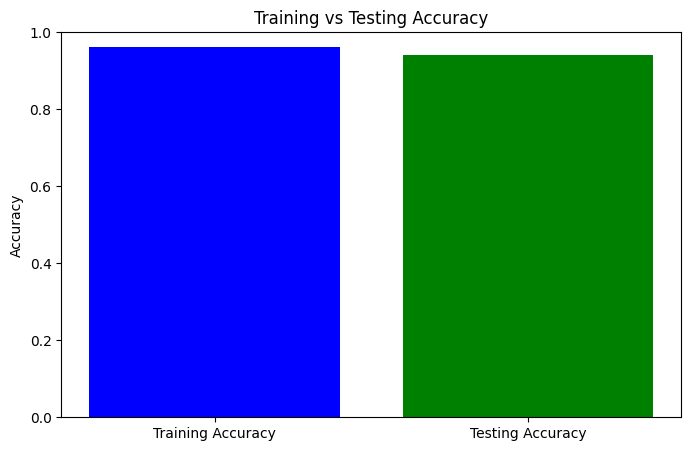

In [28]:

# Calculate accuracy on the training set and test set
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

# Print accuracies
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Plotting the accuracies for visual comparison
plt.figure(figsize=(8, 5))
plt.bar(['Training Accuracy', 'Testing Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'green'])
plt.ylim([0, 1])  # Set the limit of y-axis to 1 for better comparison if needed
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy')
plt.show()

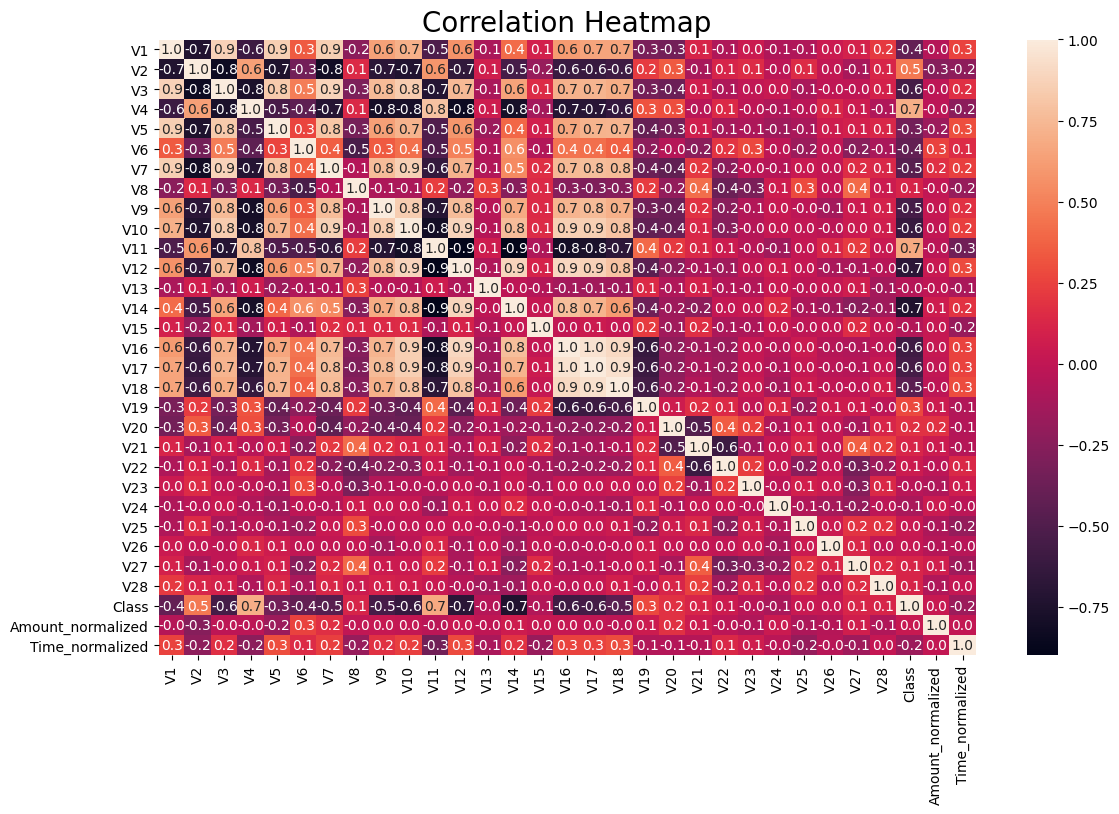

Number of pairs with correlations greater than 0.7: 61


In [57]:
# Correlation matrix
corr_under_sampling = balanced_data.corr()

f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr_under_sampling, annot=True, fmt=".1f") # Heatmap with correlations

plt.tight_layout()
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

corr_smote = balanced_data.corr()

# Filtering correlations
high_corr_pairs = []
correlation_value = 0.7
for i in range(len(corr_smote.columns)):
    for j in range(i):
        if abs(corr_smote.iloc[i, j]) >= correlation_value:
            high_corr_pairs.append((corr_smote.columns[i], corr_smote.columns[j]))

print(f'Number of pairs with correlations greater than {correlation_value}: {len(set(high_corr_pairs))}')

In [59]:
# Parameter grid to search best parameters
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [1, 3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

rf = RandomForestClassifier() # Classifier

# Using k-fold cross-validation to split the data and starting the search
cv = StratifiedKFold(n_splits=3)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, cv=cv, n_jobs=-1, n_iter=10)
random_search.fit(X_train, y_train)

# Best parameters
best_params = random_search.best_params_

# Training the model using the best parameters
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)

y_train_pred = best_model.predict(X_train) # Predictions on the training set
y_test_pred = best_model.predict(X_test) # Predictions on the test set

train_accuracy = accuracy_score(y_train, y_train_pred) # Training accuracy
test_accuracy = accuracy_score(y_test, y_test_pred) # Test accuracy

# Calculate the ROC AUC score, (Area Under the Receiver Operating Characteristic Curve)
# It is equivalent to the probability that a randomly chosen positive instance is ranked higher than a randomly chosen negative instance  
roc_auc = roc_auc_score(y_test, y_test_pred)

# Metrics
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"ROC AUC Score: {roc_auc}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print(f"Classification report for {best_model.__class__.__name__}: \n{classification_report(y_test, y_test_pred)}")
print('Best params:', best_params)

Train Accuracy: 0.9788519637462235
Test Accuracy: 0.9436619718309859
ROC AUC Score: 0.9441468253968255
Confusion Matrix:
[[137   3]
 [ 13 131]]
Classification report for RandomForestClassifier: 
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       140
           1       0.98      0.91      0.94       144

    accuracy                           0.94       284
   macro avg       0.95      0.94      0.94       284
weighted avg       0.95      0.94      0.94       284

Best params: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': None, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': True}


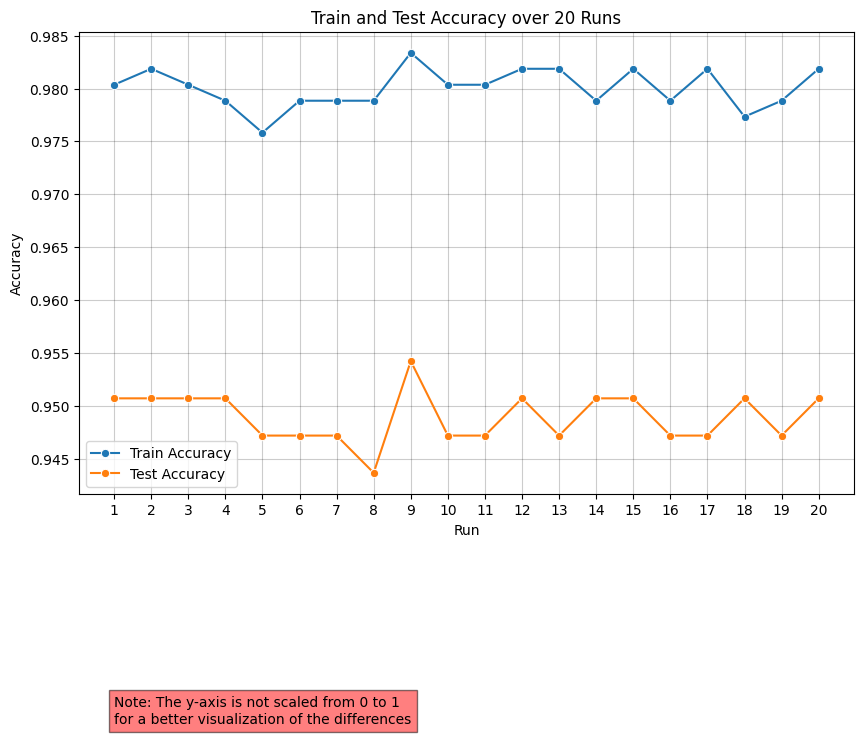

In [60]:
# Lists to store accuracies
train_accuracies = []
test_accuracies = []

for i in range(20):
    best_model_20_runs = RandomForestClassifier(**best_params, random_state=i)
    best_model_20_runs.fit(X_train, y_train)
    
    y_train_pred = best_model_20_runs.predict(X_train) # Predictions on the training set
    y_test_pred = best_model_20_runs.predict(X_test) # Predictions on the test set

    train_accuracy = accuracy_score(y_train, y_train_pred) # Training accuracy
    test_accuracy = accuracy_score(y_test, y_test_pred) # Test accuracy

    # Appending accuracies to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, 21), y=train_accuracies, marker='o', label='Train Accuracy')
sns.lineplot(x=range(1, 21), y=test_accuracies, marker='o', label='Test Accuracy')
plt.title('Train and Test Accuracy over 20 Runs')
plt.xlabel('Run')
plt.ylabel('Accuracy')
plt.xticks(range(1, 21))
plt.legend()
plt.grid(True, alpha=0.2, color='black')

# Add a note
plt.text(1, 0.92, 'Note: The y-axis is not scaled from 0 to 1\nfor a better visualization of the differences', 
         bbox=dict(facecolor='red', alpha=0.5))

plt.show()


In [61]:
 # Print the accuracy for each run
print(f"Run {i+1}: Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy}")


Run 20: Train Accuracy: 0.98, Test Accuracy: 0.9507042253521126


In [62]:
# Computing precision-recall pairs for different probability thresholds
y_score = best_model.predict_proba(X_test)[:,1]
precision, recall, _ = precision_recall_curve(y_test, y_score)

In [63]:
# Computing the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Computing the average precision score
average_precision = average_precision_score(y_test, y_score)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.98


Cross-validated accuracy scores: [0.91578947 0.96296296 0.93121693 0.95767196 0.94179894]
Mean accuracy: 0.9418880534670008


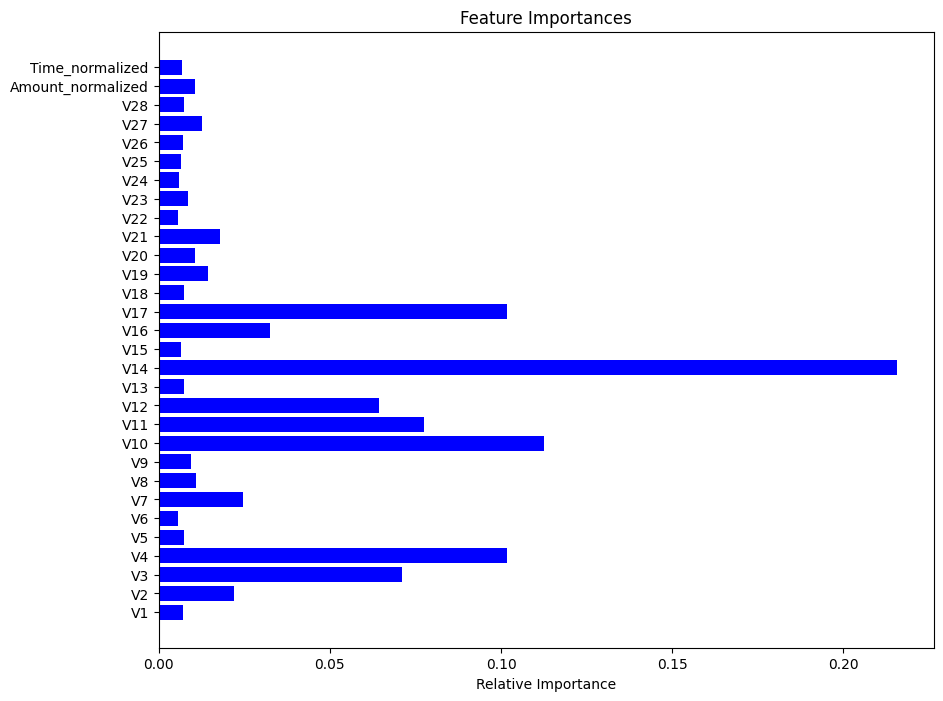

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score

# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Cross-validation
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
scores = cross_val_score(model, balanced_data.drop('Class', axis=1), balanced_data['Class'], cv=cv, scoring=make_scorer(accuracy_score))

print("Cross-validated accuracy scores:", scores)
print("Mean accuracy:", scores.mean())

# Train the model to evaluate feature importances
model.fit(balanced_data.drop('Class', axis=1), balanced_data['Class'])
importances = model.feature_importances_
feature_names = balanced_data.drop('Class', axis=1).columns


# Plot feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.barh(range(len(importances)), importances, color='b', align='center')
plt.yticks(range(len(importances)), feature_names)
plt.xlabel('Relative Importance')
plt.show()


In [25]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Define base learners
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(probability=True)),
    ('dt', DecisionTreeClassifier())
]

# Define the meta-learner
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression(), cv=5
)

# Fit the stacking classifier
clf.fit(X_train, y_train)

# Predictions and model evaluation
y_pred = clf.predict(X_test)
print("Accuracy on test set:", accuracy_score(y_test, y_pred))


Accuracy on test set: 0.9471830985915493


In [26]:
from sklearn.metrics import classification_report, roc_auc_score

# Extended predictions for evaluation
y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Detailed classification report
print("Detailed Classification Report:")
print(classification_report(y_test, y_pred))

# Compute ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)


Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       140
           1       0.96      0.93      0.95       144

    accuracy                           0.95       284
   macro avg       0.95      0.95      0.95       284
weighted avg       0.95      0.95      0.95       284

ROC AUC Score: 0.9865079365079366
